In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip '/content/gdrive/MyDrive/datasetjadi.zip' -d '/content/gdrive/MyDrive/Data'

Archive:  /content/gdrive/MyDrive/datasetjadi.zip
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_00.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_01.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_02.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_03.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_04.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_05.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_06.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_07.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_08.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_09.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_10.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_11.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_12.jpg  
  inflating: /content/gdrive/MyDrive/Data/monkeypox/M01_01_13.jpg 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pathlib
import shutil
import os
import glob
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

%matplotlib inline

In [4]:
!pip install split_folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders

splitfolders.ratio('/content/gdrive/MyDrive/Data', output='/content/gdrive/MyDrive/Data/data_model', seed=3, ratio=(.6, .4))

Copying files: 2390 files [00:24, 96.97 files/s]


In [6]:
#Direktori Utama
base_dir = '/content/gdrive/MyDrive/Data/data_model'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
#Direktori Train
train_monkeypox_dir = os.path.join(train_dir, 'monkeypox')
train_smallpox_dir = os.path.join(train_dir, 'smallpox')
train_others_dir = os.path.join(train_dir, 'Others')
#Direktori Validasi
val_monkeypox_dir = os.path.join(validation_dir, 'monkeypox')
val_smallpox_dir = os.path.join(validation_dir, 'smallpox')
val_others_dir = os.path.join(validation_dir, 'Others')

In [7]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [8]:
train_generator = datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20,
        class_mode='categorical')
 
validation_generator = datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20, 
        class_mode='categorical')

Found 1433 images belonging to 3 classes.
Found 957 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])
model.layers[0].trainable = False

234545216/234545216 [==============================] - 11s 0us/step


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 dropout (Dropout)           (None, 5, 5, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 84,678,659
Trainable params: 26,347,011
No

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
72/72 - 44s - loss: 2.2507 - accuracy: 0.6636 - val_loss: 0.7707 - val_accuracy: 0.7346 - 44s/epoch - 605ms/step
Epoch 2/50
72/72 - 23s - loss: 0.8058 - accuracy: 0.7718 - val_loss: 0.4795 - val_accuracy: 0.8286 - 23s/epoch - 320ms/step
Epoch 3/50
72/72 - 23s - loss: 0.5020 - accuracy: 0.8276 - val_loss: 0.7105 - val_accuracy: 0.8130 - 23s/epoch - 313ms/step
Epoch 4/50
72/72 - 22s - loss: 0.4183 - accuracy: 0.8472 - val_loss: 0.5657 - val_accuracy: 0.8276 - 22s/epoch - 307ms/step
Epoch 5/50
72/72 - 22s - loss: 0.3851 - accuracy: 0.8479 - val_loss: 0.6136 - val_accuracy: 0.8464 - 22s/epoch - 305ms/step
Epoch 6/50
72/72 - 24s - loss: 0.3503 - accuracy: 0.8730 - val_loss: 0.5632 - val_accuracy: 0.8474 - 24s/epoch - 340ms/step
Epoch 7/50
72/72 - 22s - loss: 0.4054 - accuracy: 0.8625 - val_loss: 0.4899 - val_accuracy: 0.8506 - 22s/epoch - 311ms/step
Epoch 8/50
72/72 - 23s - loss: 0.3171 - accuracy: 0.8842 - val_loss: 0.4370 - val_accuracy: 0.8610 - 23s/epoch - 313ms/step
Epoch 9/

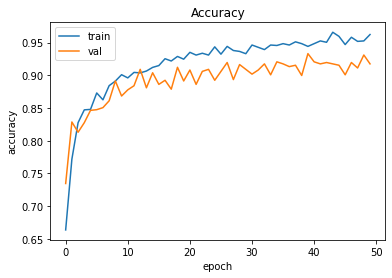

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

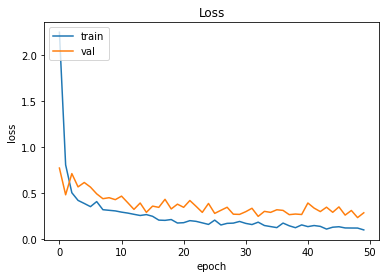

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
tf.keras.models.save_model(model,'modelbaru.hdf5')

In [17]:
!pip install streamlit -q

     |████████████████████████████████| 9.2 MB 33.5 MB/s 
     |████████████████████████████████| 182 kB 74.5 MB/s 
     |████████████████████████████████| 4.7 MB 57.5 MB/s 
     |████████████████████████████████| 164 kB 73.0 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 237 kB 64.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 8.0 MB/s 


In [20]:
%%writefile app.py
import streamlit as st
import tensorflow as tf


bg_img = """

<style>

[data-testid="stAppViewContainer"] > .main{
        background-image: url("https://www.srikotamedical.com/wp-content/uploads/2021/08/Ct-Scan-2.jpg");
        background-size: 1600px 750px;
}
#MainMenu{visibility: hidden;}
footer{visibility: hidden;}
header{visibility: hidden;}

div.css-zt5igj.e16nr0p33{
        background-size: 100% ;
        top: 0px;
        height: 75px;
        position: fixed;
        background: rgba(209, 209, 209, 0.42);
        font-family: 'Inter';
        font-style: normal;
        font-weight: 700;
        font-size: 40px;
        line-height: 48px;
        text-align: center;
        color: black;
}



</style>

"""
st.header('Prediksi Cacar Monyet dan Cacar Biasa')
st.markdown(bg_img, unsafe_allow_html=True)

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/modelbaru.hdf5')
  return model
model = load_model()



file = st.file_uploader("masukkan gambar",type=["jpg","png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):

        size = (150,150)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        img = np.asarray(image)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)

        return prediction

if file is None:
    st.text("tolong masukkan gambar")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names = ['monkeypox', 'Others', 'smallpox']
    string = "tergolong :" +class_names[np.argmax(predictions)]
    st.success(string)

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 1d10296e4c2eac6


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.186.191:8501

npx: installed 22 in 2.97s
your url is: https://cold-animals-vanish-34-124-186-191.loca.lt


================================================================================================